# 🏠 AirBnB Booking Analysis Using Exploratory Data Analysis (EDA)



📌 Introduction

This project focuses on performing Exploratory Data Analysis (EDA) on the Airbnb, Inc. booking dataset. The goal is to uncover hidden patterns, clean the data, and visualize important insights related to property listings, pricing, reviews, and host behavior.

EDA helps us understand the structure of the dataset, detect missing values, analyze distributions, and identify relationships between variables before building any predictive model.

🌍 About the AirBnB Platform

AirBnB is a global online marketplace that connects property owners (hosts) with travelers seeking short-term accommodations. Founded in 2008, the platform has expanded rapidly and now operates in over 220 countries and regions worldwide.

AirBnB offers diverse lodging options, including:

- Private rooms

- Entire apartments or houses

- Shared spaces

- Unique stays (e.g., treehouses, villas, castles)

This diversity allows travelers to choose accommodations that match their preferences and budget, while hosts can generate income from unused or underutilized spaces.

🎯 Objective of the Analysis

- Perform data cleaning and preprocessing

- Analyze price distribution and booking trends

- Study host and neighborhood patterns

- Visualize review and availability relationships

- Extract actionable insights from the dataset

In [2]:
# importing Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# Loading Dataset
data = pd.read_csv('Data_Set/Airbnb_Open_Data.csv')

C:\Users\ABRISH\AppData\Local\Temp\ipykernel_3640\2633850460.py:2: DtypeWarning: Columns (0: license) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv('Data_Set/Airbnb_Open_Data.csv')


In [4]:
# shape of the Dataset
data.shape

(102599, 26)

In [5]:
# column names
data.columns


Index(['id', 'NAME', 'host id', 'host_identity_verified', 'host name',
       'neighbourhood group', 'neighbourhood', 'lat', 'long', 'country',
       'country code', 'instant_bookable', 'cancellation_policy', 'room type',
       'Construction year', 'price', 'service fee', 'minimum nights',
       'number of reviews', 'last review', 'reviews per month',
       'review rate number', 'calculated host listings count',
       'availability 365', 'house_rules', 'license'],
      dtype='str')

In [18]:
# Data Type
data.dtypes

id                                  int64
NAME                                  str
host id                             int64
host_identity_verified                str
host name                             str
neighbourhood group                   str
neighbourhood                         str
lat                               float64
long                              float64
country                               str
country code                          str
instant_bookable                   object
cancellation_policy                   str
room type                             str
Construction year                 float64
price                                 str
service fee                           str
minimum nights                    float64
number of reviews                 float64
last review                           str
reviews per month                 float64
review rate number                float64
calculated host listings count    float64
availability 365                  

In [6]:
# Missing values count
data.isna().sum()

id                                     0
NAME                                 250
host id                                0
host_identity_verified               289
host name                            406
neighbourhood group                   29
neighbourhood                         16
lat                                    8
long                                   8
country                              532
country code                         131
instant_bookable                     105
cancellation_policy                   76
room type                              0
Construction year                    214
price                                247
service fee                          273
minimum nights                       409
number of reviews                    183
last review                        15893
reviews per month                  15879
review rate number                   326
calculated host listings count       319
availability 365                     448
house_rules     

In [7]:
# Duplicate rows count
data.duplicated().sum()

np.int64(541)

In [8]:
# standardizing column Names
data.columns = data.columns.str.lower()

In [9]:
data.columns

Index(['id', 'name', 'host id', 'host_identity_verified', 'host name',
       'neighbourhood group', 'neighbourhood', 'lat', 'long', 'country',
       'country code', 'instant_bookable', 'cancellation_policy', 'room type',
       'construction year', 'price', 'service fee', 'minimum nights',
       'number of reviews', 'last review', 'reviews per month',
       'review rate number', 'calculated host listings count',
       'availability 365', 'house_rules', 'license'],
      dtype='str')

In [10]:
# Replace Spaces with Underscore
data.columns = data.columns.str.replace(' ','_')

In [11]:
# Remove leading/Trailing Spaces
data.columns = data.columns.str.strip()

In [12]:
data.columns

Index(['id', 'name', 'host_id', 'host_identity_verified', 'host_name',
       'neighbourhood_group', 'neighbourhood', 'lat', 'long', 'country',
       'country_code', 'instant_bookable', 'cancellation_policy', 'room_type',
       'construction_year', 'price', 'service_fee', 'minimum_nights',
       'number_of_reviews', 'last_review', 'reviews_per_month',
       'review_rate_number', 'calculated_host_listings_count',
       'availability_365', 'house_rules', 'license'],
      dtype='str')

In [13]:
# Remove Duplicate Rows
data = data.drop_duplicates()

In [14]:
data.duplicated().any()

np.False_

In [15]:
# Handling Missing Values
data.isna().sum()/len(data)*100

id                                 0.000000
name                               0.244959
host_id                            0.000000
host_identity_verified             0.283172
host_name                          0.395853
neighbourhood_group                0.028415
neighbourhood                      0.015677
lat                                0.007839
long                               0.007839
country                            0.521272
country_code                       0.128358
instant_bookable                   0.102883
cancellation_policy                0.074467
room_type                          0.000000
construction_year                  0.209685
price                              0.242019
service_fee                        0.267495
minimum_nights                     0.391934
number_of_reviews                  0.179310
last_review                       15.512748
reviews_per_month                 15.499030
review_rate_number                 0.312567
calculated_host_listings_count  

In [16]:
# Removing Columns with >50 missing rate
columns_to_drop = ['house_rules','license']
data = data.drop(columns =columns_to_drop)

In [17]:
data.columns

Index(['id', 'name', 'host_id', 'host_identity_verified', 'host_name',
       'neighbourhood_group', 'neighbourhood', 'lat', 'long', 'country',
       'country_code', 'instant_bookable', 'cancellation_policy', 'room_type',
       'construction_year', 'price', 'service_fee', 'minimum_nights',
       'number_of_reviews', 'last_review', 'reviews_per_month',
       'review_rate_number', 'calculated_host_listings_count',
       'availability_365'],
      dtype='str')

In [18]:
data.dtypes

id                                  int64
name                                  str
host_id                             int64
host_identity_verified                str
host_name                             str
neighbourhood_group                   str
neighbourhood                         str
lat                               float64
long                              float64
country                               str
country_code                          str
instant_bookable                   object
cancellation_policy                   str
room_type                             str
construction_year                 float64
price                                 str
service_fee                           str
minimum_nights                    float64
number_of_reviews                 float64
last_review                           str
reviews_per_month                 float64
review_rate_number                float64
calculated_host_listings_count    float64
availability_365                  

In [19]:
data['last_review'].unique()

<StringArray>
['10/19/2021',  '5/21/2022',          nan,   '7/5/2019', '11/19/2018',
  '6/22/2019',  '10/5/2017',  '6/24/2019',  '7/21/2017',   '6/9/2019',
 ...
   '3/4/2020',   '3/3/2020',   '3/2/2020',   '3/1/2020',  '2/29/2020',
  '2/28/2020',  '2/27/2020',  '2/26/2020',  '2/25/2020',  '2/24/2020']
Length: 2478, dtype: str

In [20]:
# changing the data type of service_fee column from str to numeric
# the first step will be clean the string : Remove '$' and ','
# now we use regex = True to find these specific symbols
data['service_fee'] = data['service_fee'].str.replace(r'[\$,]','',regex = True)
# convert the numeric
data['service_fee'] = pd.to_numeric(data['service_fee'])


In [21]:
data['service_fee'].dtype

dtype('float64')

In [22]:
# converting the datatype of price from str to numeric. since the price column has $ and , we can not directly convert it to numeric so first we should remove these using regex

data['price'] =data['price'].str.replace(r'[\$,]','',regex = True)
data['price'] =pd.to_numeric(data['price'])

In [23]:
data['price']

0          966.0
1          142.0
2          620.0
3          368.0
4          204.0
           ...  
102053     696.0
102054     909.0
102055     387.0
102056     848.0
102057    1128.0
Name: price, Length: 102058, dtype: float64

In [24]:
data.dtypes

id                                  int64
name                                  str
host_id                             int64
host_identity_verified                str
host_name                             str
neighbourhood_group                   str
neighbourhood                         str
lat                               float64
long                              float64
country                               str
country_code                          str
instant_bookable                   object
cancellation_policy                   str
room_type                             str
construction_year                 float64
price                             float64
service_fee                       float64
minimum_nights                    float64
number_of_reviews                 float64
last_review                           str
reviews_per_month                 float64
review_rate_number                float64
calculated_host_listings_count    float64
availability_365                  

In [25]:
# changing the datatype of last_review from str to datetime , the Nan(not a number) will be replaced with NaT(not a time)
data['last_review'] = pd.to_datetime(data['last_review'])


In [26]:
data['last_review']

0        2021-10-19
1        2022-05-21
2               NaT
3        2019-07-05
4        2018-11-19
            ...    
102053   2019-03-27
102054   2017-08-31
102055   2019-06-26
102056          NaT
102057   2019-06-15
Name: last_review, Length: 102058, dtype: datetime64[us]

In [27]:
data.dtypes

id                                         int64
name                                         str
host_id                                    int64
host_identity_verified                       str
host_name                                    str
neighbourhood_group                          str
neighbourhood                                str
lat                                      float64
long                                     float64
country                                      str
country_code                                 str
instant_bookable                          object
cancellation_policy                          str
room_type                                    str
construction_year                        float64
price                                    float64
service_fee                              float64
minimum_nights                           float64
number_of_reviews                        float64
last_review                       datetime64[us]
reviews_per_month   

In [28]:
# converting the datatpe of construction_year column from float to datetime ,2023.0 to 2023-01-01 suitable for time analysis
data['construction_year'] = pd.to_datetime(data['construction_year'],format = '%Y' )

In [29]:
data['construction_year'] = data['construction_year'].dt.year

In [30]:
data['construction_year'] = data['construction_year'].astype('Int64')

In [32]:
data['construction_year']

0         2020
1         2007
2         2005
3         2005
4         2009
          ... 
102053    <NA>
102054    <NA>
102055    <NA>
102056    <NA>
102057    2011
Name: construction_year, Length: 102058, dtype: Int64

In [33]:
data['availability_365'].tail(10)

102048     31.0
102049      0.0
102050    268.0
102051     88.0
102052    323.0
102053      0.0
102054      0.0
102055    235.0
102056      0.0
102057    238.0
Name: availability_365, dtype: float64

In [34]:
# changing the datatype of 'availability_365' column from float to Int64
data['availability_365'] = data['availability_365'].astype('Int64')

In [35]:
data['availability_365'].dtype

Int64Dtype()

In [36]:
data['calculated_host_listings_count'].tail(10)

102048    1.0
102049    2.0
102050    1.0
102051    1.0
102052    1.0
102053    1.0
102054    2.0
102055    2.0
102056    1.0
102057    1.0
Name: calculated_host_listings_count, dtype: float64

In [37]:
# changing the datatype of calculated_host_listings_count from float to Int64
data['calculated_host_listings_count'] = data['calculated_host_listings_count'].astype('Int64')

In [39]:
data['calculated_host_listings_count']

0         6
1         2
2         1
3         1
4         1
         ..
102053    1
102054    2
102055    2
102056    1
102057    1
Name: calculated_host_listings_count, Length: 102058, dtype: Int64

In [41]:
data['review_rate_number'].tail()

102053    5.0
102054    3.0
102055    4.0
102056    1.0
102057    4.0
Name: review_rate_number, dtype: float64

In [42]:
# changing the datatype of the review_rate_number column from float64 to Int64
data['review_rate_number'] = data['review_rate_number'].astype('Int64')

In [43]:
data['review_rate_number']

0         4
1         4
2         5
3         4
4         3
         ..
102053    5
102054    3
102055    4
102056    1
102057    4
Name: review_rate_number, Length: 102058, dtype: Int64

In [44]:
# changing the datatype of the number_of_reviews column from float64 to Int64
data['number_of_reviews'] = data['number_of_reviews'].astype('Int64')

In [45]:
data['number_of_reviews']

0           9
1          45
2           0
3         270
4           9
         ... 
102053     12
102054     19
102055     50
102056      0
102057     22
Name: number_of_reviews, Length: 102058, dtype: Int64

In [46]:
# changing the datatype of the minimum_nights column from float64 to Int64
data['minimum_nights'] = data['minimum_nights'].astype('Int64')

In [47]:
data['minimum_nights'].tail()

102053    7
102054    1
102055    2
102056    2
102057    4
Name: minimum_nights, dtype: Int64

In [48]:
data.dtypes

id                                         int64
name                                         str
host_id                                    int64
host_identity_verified                       str
host_name                                    str
neighbourhood_group                          str
neighbourhood                                str
lat                                      float64
long                                     float64
country                                      str
country_code                                 str
instant_bookable                          object
cancellation_policy                          str
room_type                                    str
construction_year                          Int64
price                                    float64
service_fee                              float64
minimum_nights                             Int64
number_of_reviews                          Int64
last_review                       datetime64[us]
reviews_per_month   

In [49]:
data.shape

(102058, 24)

In [50]:
data.head()

,id,name,host_id,host_identity_verified,host_name,neighbourhood_group,neighbourhood,lat,long,country,...,construction_year,price,service_fee,minimum_nights,number_of_reviews,last_review,reviews_per_month,review_rate_number,calculated_host_listings_count,availability_365
0,1001254,Clean & quiet apt home by the park,80014485718,unconfirmed,Madaline,Brooklyn,Kensington,40.64749,-73.97237,United States,...,2020,966.0,193.0,10,9,2021-10-19,0.21,4,6,286
1,1002102,Skylit Midtown Castle,52335172823,verified,Jenna,Manhattan,Midtown,40.75362,-73.98377,United States,...,2007,142.0,28.0,30,45,2022-05-21,0.38,4,2,228
2,1002403,THE VILLAGE OF HARLEM....NEW YORK !,78829239556,NaN,Elise,Manhattan,Harlem,40.80902,-73.94190,United States,...,2005,620.0,124.0,3,0,NaT,NaN,5,1,352
3,1002755,NaN,85098326012,unconfirmed,Garry,Brooklyn,Clinton Hill,40.68514,-73.95976,United States,...,2005,368.0,74.0,30,270,2019-07-05,4.64,4,1,322
4,1003689,Entire Apt: Spacious Studio/Loft by central park,92037596077,verified,Lyndon,Manhattan,East Harlem,40.79851,-73.94399,United States,...,2009,204.0,41.0,10,9,2018-11-19,0.10,3,1,289


In [51]:
# Handling missing Values
data.isna().sum()[data.isna().sum() >0]

name                                250
host_identity_verified              289
host_name                           404
neighbourhood_group                  29
neighbourhood                        16
lat                                   8
long                                  8
country                             532
country_code                        131
instant_bookable                    105
cancellation_policy                  76
construction_year                   214
price                               247
service_fee                         273
minimum_nights                      400
number_of_reviews                   183
last_review                       15832
reviews_per_month                 15818
review_rate_number                  319
calculated_host_listings_count      319
availability_365                    448
dtype: int64

In [52]:
# Filling missing values for the price column using median
data['price'] = data['price'].fillna(data['price'].median(),inplace = True)


C:\Users\ABRISH\AppData\Local\Temp\ipykernel_3640\3853544265.py:2: ChainedAssignmentError: A value is being set on a copy of a DataFrame or Series through chained assignment using an inplace method.
Such inplace method never works to update the original DataFrame or Series, because the intermediate object on which we are setting values always behaves as a copy (due to Copy-on-Write).

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' instead, to perform the operation inplace on the original object, or try to avoid an inplace operation using 'df[col] = df[col].method(value)'.

See the documentation for a more detailed explanation: https://pandas.pydata.org/pandas-docs/stable/user_guide/copy_on_write.html
  data['price'] = data['price'].fillna(data['price'].median(),inplace = True)


In [53]:
data['price'].isna().sum()

np.int64(0)

In [54]:
# # Filling missing values for the service_fee column using median

data['service_fee'] = data['service_fee'].fillna(data['service_fee'].median(),inplace = True)

C:\Users\ABRISH\AppData\Local\Temp\ipykernel_3640\699982019.py:3: ChainedAssignmentError: A value is being set on a copy of a DataFrame or Series through chained assignment using an inplace method.
Such inplace method never works to update the original DataFrame or Series, because the intermediate object on which we are setting values always behaves as a copy (due to Copy-on-Write).

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' instead, to perform the operation inplace on the original object, or try to avoid an inplace operation using 'df[col] = df[col].method(value)'.

See the documentation for a more detailed explanation: https://pandas.pydata.org/pandas-docs/stable/user_guide/copy_on_write.html
  data['service_fee'] = data['service_fee'].fillna(data['service_fee'].median(),inplace = True)


In [55]:
data['service_fee'].isna().sum()

np.int64(0)

In [56]:
# Filling missing values for the name colum

data['name'] = data['name'].fillna('Unknown',inplace = True)

C:\Users\ABRISH\AppData\Local\Temp\ipykernel_3640\1547756556.py:3: ChainedAssignmentError: A value is being set on a copy of a DataFrame or Series through chained assignment using an inplace method.
Such inplace method never works to update the original DataFrame or Series, because the intermediate object on which we are setting values always behaves as a copy (due to Copy-on-Write).

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' instead, to perform the operation inplace on the original object, or try to avoid an inplace operation using 'df[col] = df[col].method(value)'.

See the documentation for a more detailed explanation: https://pandas.pydata.org/pandas-docs/stable/user_guide/copy_on_write.html
  data['name'] = data['name'].fillna('Unknown',inplace = True)


In [57]:
data['name'].isna().sum()

np.int64(0)

In [58]:
data['host_identity_verified'] = data['host_identity_verified'].fillna('unconfirmed',inplace = True)

C:\Users\ABRISH\AppData\Local\Temp\ipykernel_3640\777905325.py:1: ChainedAssignmentError: A value is being set on a copy of a DataFrame or Series through chained assignment using an inplace method.
Such inplace method never works to update the original DataFrame or Series, because the intermediate object on which we are setting values always behaves as a copy (due to Copy-on-Write).

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' instead, to perform the operation inplace on the original object, or try to avoid an inplace operation using 'df[col] = df[col].method(value)'.

See the documentation for a more detailed explanation: https://pandas.pydata.org/pandas-docs/stable/user_guide/copy_on_write.html
  data['host_identity_verified'] = data['host_identity_verified'].fillna('unconfirmed',inplace = True)


In [59]:
data['neighbourhood_group'] = data['neighbourhood_group'].fillna('Unknown' , inplace = True)

C:\Users\ABRISH\AppData\Local\Temp\ipykernel_3640\3713919929.py:1: ChainedAssignmentError: A value is being set on a copy of a DataFrame or Series through chained assignment using an inplace method.
Such inplace method never works to update the original DataFrame or Series, because the intermediate object on which we are setting values always behaves as a copy (due to Copy-on-Write).

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' instead, to perform the operation inplace on the original object, or try to avoid an inplace operation using 'df[col] = df[col].method(value)'.

See the documentation for a more detailed explanation: https://pandas.pydata.org/pandas-docs/stable/user_guide/copy_on_write.html
  data['neighbourhood_group'] = data['neighbourhood_group'].fillna('Unknown' , inplace = True)


In [60]:
data['neighbourhood_group'].isna().sum()

np.int64(0)

In [61]:
data['neighbourhood'] = data['neighbourhood'].fillna('Unknown',inplace = True) 

C:\Users\ABRISH\AppData\Local\Temp\ipykernel_3640\1111121872.py:1: ChainedAssignmentError: A value is being set on a copy of a DataFrame or Series through chained assignment using an inplace method.
Such inplace method never works to update the original DataFrame or Series, because the intermediate object on which we are setting values always behaves as a copy (due to Copy-on-Write).

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' instead, to perform the operation inplace on the original object, or try to avoid an inplace operation using 'df[col] = df[col].method(value)'.

See the documentation for a more detailed explanation: https://pandas.pydata.org/pandas-docs/stable/user_guide/copy_on_write.html
  data['neighbourhood'] = data['neighbourhood'].fillna('Unknown',inplace = True)


In [62]:
data['neighbourhood'].isna().sum()

np.int64(0)

In [63]:
data['lat'].tail()

102053    40.64945
102054    40.69872
102055    40.67810
102056    40.81248
102057    40.81315
Name: lat, dtype: float64

In [64]:
data['country'] = data['country'].fillna(data['country'].mode()[0],inplace = True)

C:\Users\ABRISH\AppData\Local\Temp\ipykernel_3640\3919141268.py:1: ChainedAssignmentError: A value is being set on a copy of a DataFrame or Series through chained assignment using an inplace method.
Such inplace method never works to update the original DataFrame or Series, because the intermediate object on which we are setting values always behaves as a copy (due to Copy-on-Write).

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' instead, to perform the operation inplace on the original object, or try to avoid an inplace operation using 'df[col] = df[col].method(value)'.

See the documentation for a more detailed explanation: https://pandas.pydata.org/pandas-docs/stable/user_guide/copy_on_write.html
  data['country'] = data['country'].fillna(data['country'].mode()[0],inplace = True)


In [65]:
data['country'].isna().sum()

np.int64(0)

In [66]:
data['country_code'] = data['country_code'].fillna(data['country_code'].mode()[0],inplace = True)

C:\Users\ABRISH\AppData\Local\Temp\ipykernel_3640\2445890508.py:1: ChainedAssignmentError: A value is being set on a copy of a DataFrame or Series through chained assignment using an inplace method.
Such inplace method never works to update the original DataFrame or Series, because the intermediate object on which we are setting values always behaves as a copy (due to Copy-on-Write).

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' instead, to perform the operation inplace on the original object, or try to avoid an inplace operation using 'df[col] = df[col].method(value)'.

See the documentation for a more detailed explanation: https://pandas.pydata.org/pandas-docs/stable/user_guide/copy_on_write.html
  data['country_code'] = data['country_code'].fillna(data['country_code'].mode()[0],inplace = True)


In [68]:
data['country_code'].isna().sum()

np.int64(0)

In [69]:
data['cancellation_policy'].unique()

<StringArray>
['strict', 'moderate', 'flexible', nan]
Length: 4, dtype: str

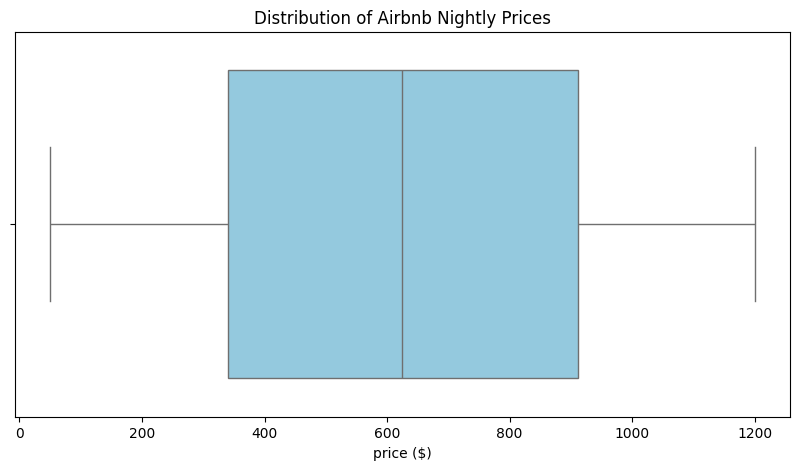

In [71]:
plt.figure(figsize=(10,5))
sns.boxplot(x = data['price'] , color = 'skyblue')
plt.title('Distribution of Airbnb Nightly Prices')
plt.xlabel('price ($)')
plt.show()

In [72]:
data.columns

Index(['id', 'name', 'host_id', 'host_identity_verified', 'host_name',
       'neighbourhood_group', 'neighbourhood', 'lat', 'long', 'country',
       'country_code', 'instant_bookable', 'cancellation_policy', 'room_type',
       'construction_year', 'price', 'service_fee', 'minimum_nights',
       'number_of_reviews', 'last_review', 'reviews_per_month',
       'review_rate_number', 'calculated_host_listings_count',
       'availability_365'],
      dtype='str')

In [73]:
data.isna().sum()

id                                    0
name                                  0
host_id                               0
host_identity_verified                0
host_name                           404
neighbourhood_group                   0
neighbourhood                         0
lat                                   8
long                                  8
country                               0
country_code                          0
instant_bookable                    105
cancellation_policy                  76
room_type                             0
construction_year                   214
price                                 0
service_fee                           0
minimum_nights                      400
number_of_reviews                   183
last_review                       15832
reviews_per_month                 15818
review_rate_number                  319
calculated_host_listings_count      319
availability_365                    448
dtype: int64

In [ ]:
# Filling the missing host_name column with 'Unknown'
data['host_name'] = data['host_name'].fillna('Unknown',inplace = True)

C:\Users\ABRISH\AppData\Local\Temp\ipykernel_3640\1079216297.py:2: ChainedAssignmentError: A value is being set on a copy of a DataFrame or Series through chained assignment using an inplace method.
Such inplace method never works to update the original DataFrame or Series, because the intermediate object on which we are setting values always behaves as a copy (due to Copy-on-Write).

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' instead, to perform the operation inplace on the original object, or try to avoid an inplace operation using 'df[col] = df[col].method(value)'.

See the documentation for a more detailed explanation: https://pandas.pydata.org/pandas-docs/stable/user_guide/copy_on_write.html
  data['host_name'] = data['host_name'].fillna('Unknown',inplace = True)


In [77]:
data['host_name'].isna().sum()

np.int64(0)

In [81]:
# Filling missing value of 'instant_bookable' column with False
data['instant_bookable'] = data['instant_bookable'].fillna('False')

In [82]:
data['instant_bookable'].isna().sum()

np.int64(0)

In [89]:
# now i have to convert the datatype of the instant_bookable to bool to reduce the memory usage since it is filled with manual'False'
data['instant_bookable']=data['instant_bookable'].astype('bool')

In [88]:
data['instant_bookable'].dtype

dtype('bool')

In [95]:
data.isna().sum()

id                                    0
name                                  0
host_id                               0
host_identity_verified                0
host_name                             0
neighbourhood_group                   0
neighbourhood                         0
lat                                   8
long                                  8
country                               0
country_code                          0
instant_bookable                      0
cancellation_policy                   0
room_type                             0
construction_year                   214
price                                 0
service_fee                           0
minimum_nights                      400
number_of_reviews                   183
last_review                       15832
reviews_per_month                 15818
review_rate_number                  319
calculated_host_listings_count      319
availability_365                    448
dtype: int64

In [91]:
# Filling the missing value of the cancelation_policy column with mode
data['cancellation_policy'] = data['cancellation_policy'].fillna(data['cancellation_policy'].mode()[0])

In [93]:
data['cancellation_policy'].isna().sum()

np.int64(0)

In [101]:
# Filling missing column of the construction_year column
data['construction_year'] = data['construction_year'].fillna(data['construction_year'].mode()[0])

In [103]:
data['construction_year'].isna().sum()

np.int64(0)

In [104]:
data['construction_year'].dtype

Int64Dtype()